## <div align="center">Small Image Classification Using Convolutional Neural Network (CNN)</div>

 ##### <div align="center">There are total 10 classes as shown below.</div>
 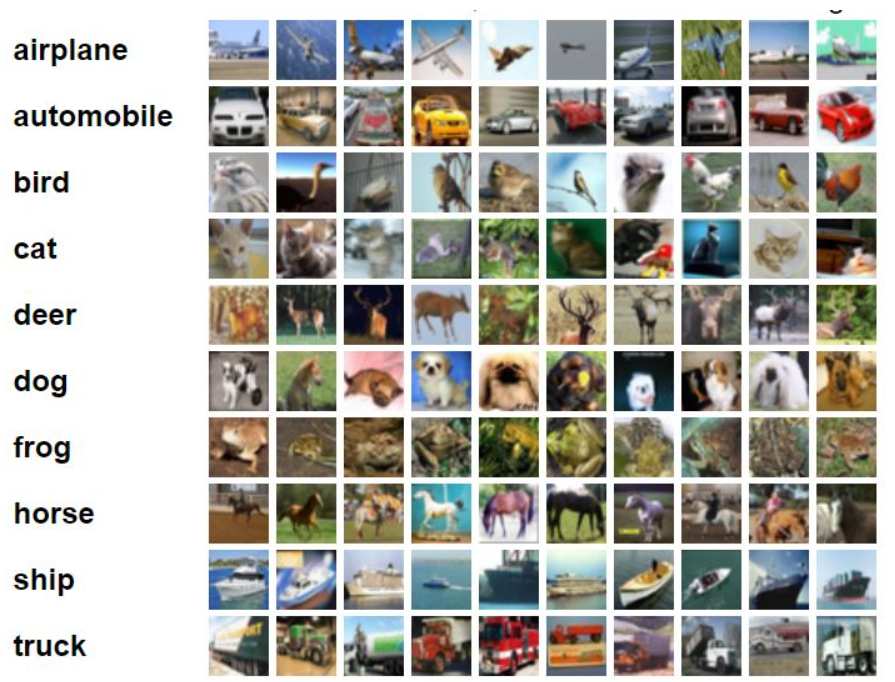

In [104]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### <div align="center">Load the dataset</div>

In [52]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()              #Imported this cifar10 dataset from tennsorflow
X_train.shape

(50000, 32, 32, 3)

In [53]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
y_train.shape

(50000, 1)

In [55]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for classification we'll convert to 1D array. so we will convert this to now 1D array

In [93]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [57]:
y_test = y_test.reshape(-1,)

In [58]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [59]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

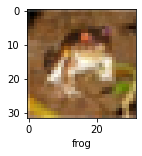

In [60]:
plot_sample(X_train, y_train, 0)

### Normalizing the training data
Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [61]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build convolutional neural network for image classification

In [63]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [64]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
X_val = X_train[-100:]
X_train = X_train[:len(X_train)-100]
y_val = y_train[-100:]
y_train = y_train[:len(y_train)-100]

In [66]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1560/1560 [==============================] - 38s 24ms/step - loss: 1.3361 - accuracy: 0.5286
Epoch 2/10
1560/1560 [==============================] - 38s 24ms/step - loss: 0.9543 - accuracy: 0.6641
Epoch 3/10
1560/1560 [==============================] - 39s 25ms/step - loss: 0.8070 - accuracy: 0.7201
Epoch 4/10
1560/1560 [==============================] - 36s 23ms/step - loss: 0.6986 - accuracy: 0.7546
Epoch 5/10
1560/1560 [==============================] - 35s 23ms/step - loss: 0.6068 - accuracy: 0.7863
Epoch 6/10
1560/1560 [==============================] - 36s 23ms/step - loss: 0.5304 - accuracy: 0.8151
Epoch 7/10
1560/1560 [==============================] - 37s 24ms/step - loss: 0.4546 - accuracy: 0.8415
Epoch 8/10
1560/1560 [==============================] - 37s 24ms/step - loss: 0.3968 - accuracy: 0.8612
Epoch 9/10
1560/1560 [==============================] - 37s 24ms/step - loss: 0.3461 - accuracy: 0.8783
Epoch 10/10
1560/1560 [==============================] - 37s 24m

In [73]:
cnn.evaluate(X_val,y_val)

4/4 [==============================] - 0s 9ms/step - loss: 1.3008 - accuracy: 0.6800


[1.3007855415344238, 0.6800000071525574]

In [46]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9347 - accuracy: 0.6889


[0.9346663951873779, 0.6888999938964844]

In [47]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[5.68832271e-04, 1.22873156e-04, 1.11829559e-03, 9.25285816e-01,
        1.97997870e-05, 6.51197657e-02, 2.99072685e-03, 4.30807377e-05,
        4.67652176e-03, 5.42406851e-05],
       [1.43394544e-04, 6.51681190e-03, 2.04172120e-05, 2.61128633e-07,
        1.32087757e-06, 8.55738094e-08, 7.99166031e-08, 3.74766636e-08,
        9.93207276e-01, 1.10293586e-04],
       [3.03907581e-02, 3.53996843e-01, 9.30743932e-04, 1.86522286e-02,
        6.90117129e-04, 3.24110663e-03, 1.45825522e-03, 1.06343115e-02,
        3.06019932e-01, 2.73985714e-01],
       [7.28746593e-01, 1.96388783e-03, 8.10967833e-02, 1.33742178e-02,
        3.18050645e-02, 5.31401893e-05, 9.02971515e-05, 1.57285074e-03,
        1.40990153e-01, 3.07014241e-04],
       [1.43455134e-06, 7.96830193e-07, 4.77097034e-02, 1.61482170e-02,
        3.90014768e-01, 5.88739640e-04, 5.45532882e-01, 2.56597104e-06,
        3.64764304e-07, 5.97213841e-07]], dtype=float32)

In [105]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [103]:
classes[y_classes[3]]

'airplane'

The CNN network gives an accuracy of 68%. So, the model correctly classified 68% of the test data.